### Get feature importance

#### Feature selection

TO DO: READ ABOUT RECURSIVE FEATURE ELIMINTATION!!!!

Do recursive feature elimination first, then decision tree, get feature importance , set a threshold and choose the top 5 most important features


L1 (L2) regularization

PCA, then random forest classifier, get feature importance 

Autoencoder

#### Clustering

KMEANS
DBSCAN (sklearn)

## To do: clustering fuel only cars
1. T-SNE, read about it, do dimensionality reduction

## Pair wise clustering
1. Hybrid and electric
2. Hybrid and fuel

## Fuzzy logic
Can we calculate car membership?
Read on fuzzy logic 

## Consumer analysis with scraped data 
Predictor for time series sales data
Couple sales data with the co2 scores
Accumulated prediction for co2 impact 


In [1]:
import sys, os
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from pathlib import Path

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics


from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

sys.path.append(os.path.abspath(os.path.join('..','./data/', './clean-data/')))
sys.path.append(os.path.abspath(os.path.join('..','./scripts/')))



In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(Path("../data/predicted-data/","predicted_co2_rating.csv"))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26961 entries, 0 to 26960
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   vehicleclass_                  26961 non-null  object 
 1   make_                          26961 non-null  object 
 2   model.1_                       26961 non-null  object 
 3   model_year                     26961 non-null  int64  
 4   cylinders_                     26961 non-null  float64
 5   fuelconsumption_city(l/100km)  26961 non-null  float64
 6   fuelconsumption_hwy(l/100km)   26961 non-null  float64
 7   fuelconsumption_comb(l/100km)  26961 non-null  float64
 8   co2emissions_(g/km)            26961 non-null  int64  
 9   number_of_gears                26961 non-null  float64
 10  predicted_co2_rating           26961 non-null  int64  
 11  original_co2r                  7973 non-null   float64
 12  enginesize_(l)                 26961 non-null 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26961 entries, 0 to 26960
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   vehicleclass_                  26961 non-null  object 
 1   make_                          26961 non-null  object 
 2   model.1_                       26961 non-null  object 
 3   model_year                     26961 non-null  int64  
 4   cylinders_                     26961 non-null  float64
 5   fuelconsumption_city(l/100km)  26961 non-null  float64
 6   fuelconsumption_hwy(l/100km)   26961 non-null  float64
 7   fuelconsumption_comb(l/100km)  26961 non-null  float64
 8   co2emissions_(g/km)            26961 non-null  int64  
 9   number_of_gears                26961 non-null  float64
 10  predicted_co2_rating           26961 non-null  int64  
 11  original_co2r                  7973 non-null   float64
 12  enginesize_(l)                 26961 non-null 

In [33]:
# Select the columns with numerical and categorical data
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

# One-hot encode the categorical columns
df_cat = pd.get_dummies(df[['vehicleclass_','make_','mapped_fuel_type','vehicle_type']])
df_num = df[num_cols]

# Combine the numerical and one-hot encoded categorical dataframes
df_processed = pd.concat([df_num, df_cat], axis=1)

# Perform recursive feature elimination to select the most important features
X = df_processed.drop(["predicted_co2_rating", "original_co2r", "id"], axis=1)
y = df_processed["predicted_co2_rating"]

dt = DecisionTreeClassifier(random_state=42)
rfecv = RFECV(estimator=dt, cv=10)
rfecv.fit(X, y)

# Plot the number of features vs. cross-validation scores
plt.figure()
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Print the most important features
print("Selected features:", X.columns[rfecv.support_])

# Fit a decision tree and get feature importances
dt.fit(X, y)
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)

# Plot the feature importances
plt.figure()
plt.title('Decision Tree Feature Importances')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Select the top 5 most important features
threshold = feat_importances.nlargest(7).min()
top_features = feat_importances[feat_importances >= threshold].index.tolist()
print("Top features:", top_features)


For n_clusters = 2 The inertia score is : 44733610.94080853 The average silhouette score is : 0.5450072441192422
For n_clusters = 3 The inertia score is : 23457078.104738217 The average silhouette score is : 0.5068843373575698
For n_clusters = 4 The inertia score is : 15514192.124139665 The average silhouette score is : 0.4760292243164493
For n_clusters = 5 The inertia score is : 11314323.780473992 The average silhouette score is : 0.4562538241306782
For n_clusters = 6 The inertia score is : 8793861.627728658 The average silhouette score is : 0.43787888773681327
For n_clusters = 7 The inertia score is : 7050612.253875385 The average silhouette score is : 0.43035367646407324
For n_clusters = 8 The inertia score is : 5976312.76299543 The average silhouette score is : 0.41351286582294783
For n_clusters = 9 The inertia score is : 5203215.473508262 The average silhouette score is : 0.40247036001564396
For n_clusters = 10 The inertia score is : 4587525.134026079 The average silhouette score 

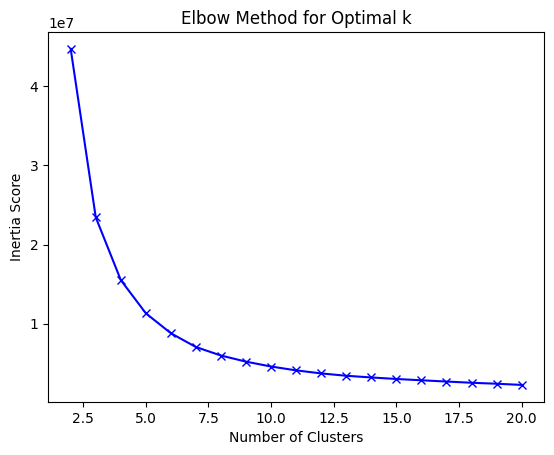

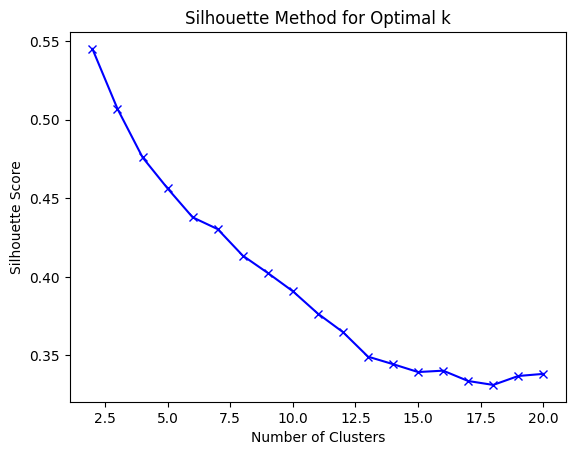

Number of clusters in DBSCAN: 116


In [7]:


# select the top 5 important features
# select only the top 5 important features
X = X[top_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[top_features])

# create a range of cluster numbers
range_n_clusters = range(2, 21)

# initialize lists to store the scores
silhouette_scores = []
inertia_scores = []

# loop over the range of cluster numbers
for n_clusters in range_n_clusters:
    
    # initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    
    # fit KMeans to the data
    kmeans.fit(X)
    
    # calculate the inertia score (within-cluster sum of squares)
    inertia_scores.append(kmeans.inertia_)
    
    # calculate the silhouette score
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # print the scores
    print("For n_clusters =", n_clusters,
          "The inertia score is :", kmeans.inertia_,
          "The average silhouette score is :", silhouette_avg)

# plot the elbow curve
plt.plot(range_n_clusters, inertia_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Elbow Method for Optimal k')
plt.show()

# plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

# initialize DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)

# fit DBSCAN to the data
dbscan.fit(X_scaled)

# print the number of clusters (unique labels) in DBSCAN
print("Number of clusters in DBSCAN:", len(np.unique(dbscan.labels_)))


In [8]:

def perform_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    return n_clusters, labels

def find_best_dbscan_params(X, eps_list, min_samples_list):
    silhouette_scores = []
    for eps in eps_list:
        for min_samples in min_samples_list:
            n_clusters, labels = perform_dbscan(X, eps, min_samples)
            if n_clusters > 1:
                silhouette_score = metrics.silhouette_score(X, labels)
                print("For eps =", eps, "and min_samples =", min_samples,
                      "the number of clusters is", n_clusters,
                      "and the average silhouette score is", silhouette_score)
                silhouette_scores.append(silhouette_score)
            else:
                print("For eps =", eps, "and min_samples =", min_samples,
                      "the number of clusters is", n_clusters)
    # print the parameter combination with the highest silhouette score
    max_index = silhouette_scores.index(max(silhouette_scores))
    eps_index = max_index // len(min_samples_list)
    min_samples_index = max_index % len(min_samples_list)
    best_eps = eps_list[eps_index]
    best_min_samples = min_samples_list[min_samples_index]
    print("The best parameter combination is eps =", best_eps,
          "and min_samples =", best_min_samples)
    return best_eps, best_min_samples

def perform_best_dbscan(X, best_eps, best_min_samples):
    n_clusters, labels = perform_dbscan(X, best_eps, best_min_samples)
    if n_clusters > 1:
        silhouette_score = metrics.silhouette_score(X, labels)
        print("Number of clusters in DBSCAN:", n_clusters)
        print("The average silhouette score is :", silhouette_score)
    else:
        print("DBSCAN only found one cluster")


eps_list = [0.5, 1, 2, 4, 8, 16]
min_samples_list = [5, 10, 20, 50, 100, 200]

best_eps, best_min_samples = find_best_dbscan_params(X_scaled, eps_list, min_samples_list)
perform_best_dbscan(X_scaled, best_eps, best_min_samples)

For eps = 0.5 and min_samples = 5 the number of clusters is 119 and the average silhouette score is -0.11678256840577231
For eps = 0.5 and min_samples = 10 the number of clusters is 80 and the average silhouette score is -0.09275607462422193
For eps = 0.5 and min_samples = 20 the number of clusters is 53 and the average silhouette score is -0.06913301817955252
For eps = 0.5 and min_samples = 50 the number of clusters is 28 and the average silhouette score is -0.030575716293646117
For eps = 0.5 and min_samples = 100 the number of clusters is 22 and the average silhouette score is -0.11509746208870127
For eps = 0.5 and min_samples = 200 the number of clusters is 12 and the average silhouette score is -0.16040157002359026
For eps = 1 and min_samples = 5 the number of clusters is 17 and the average silhouette score is 0.03312593306450924
For eps = 1 and min_samples = 10 the number of clusters is 10 and the average silhouette score is 0.05188165468031069
For eps = 1 and min_samples = 20 the

In [ ]:
def perform_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    return n_clusters, labels

def find_best_dbscan_params(X, eps_list, min_samples_list):
    max_silhouette_score = -1
    best_eps, best_min_samples = None, None
    for eps in eps_list:
        for min_samples in min_samples_list:
            n_clusters, labels = perform_dbscan(X, eps, min_samples)
            if n_clusters == 2:
                silhouette_score = metrics.silhouette_score(X, labels)
                if silhouette_score > max_silhouette_score:
                    max_silhouette_score = silhouette_score
                    best_eps, best_min_samples = eps, min_samples
                print("For eps =", eps, "and min_samples =", min_samples,
                      "the number of clusters is", n_clusters,
                      "and the average silhouette score is", silhouette_score)
            else:
                print("For eps =", eps, "and min_samples =", min_samples,
                      "the number of clusters is", n_clusters)
    # print the best hyperparameters
    print("The best hyperparameters for 2 clusters are: eps =", best_eps,
          "and min_samples =", best_min_samples)
    return best_eps, best_min_samples

def perform_best_dbscan(X, best_eps, best_min_samples):
    n_clusters, labels = perform_dbscan(X, best_eps, best_min_samples)
    if n_clusters == 2:
        silhouette_score = metrics.silhouette_score(X, labels)
        print("Number of clusters in DBSCAN:", n_clusters)
        print("The average silhouette score is:", silhouette_score)
    else:
        print("DBSCAN did not find 2 clusters")

# example usage

eps_list = [0.5, 4, 8, 16]
min_samples_list = [5, 10, 20, 50, 100, 200]

best_eps, best_min_samples = find_best_dbscan_params(X_scaled, eps_list, min_samples_list)
perform_best_dbscan(X_scaled, best_eps, best_min_samples)

In [9]:
n_clusters, labels = perform_dbscan(X_scaled, 2, 5)

In [10]:
pd.DataFrame(X_scaled, columns = top_features)

,model_year,cylinders_,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),co2emissions_(g/km),number_of_gears
0,1.641779,-1.019415,-1.027979,-1.086306,-1.073930,-1.072114,1.295801
1,1.641779,-1.019415,-0.894360,-0.893207,-0.916995,-0.889903,1.295801
2,1.641779,0.089343,-0.092647,-0.275290,-0.163707,-0.069954,1.295801
3,1.641779,-1.019415,-0.947808,-0.738728,-0.885608,-0.874719,1.295801
4,1.641779,-1.019415,-0.814189,-0.661488,-0.791447,-0.753245,1.295801
...,...,...,...,...,...,...,...
26956,-1.385303,-0.465036,-0.119370,-0.236671,-0.163707,-0.130691,-0.898815
26957,-1.385303,-0.465036,-0.119370,-0.236671,-0.163707,-0.130691,-0.350161
26958,-1.385303,-0.465036,-0.199542,-0.352530,-0.257868,-0.236980,-0.898815
26959,-1.385303,-0.465036,-0.306437,-0.391150,-0.352029,-0.343270,-0.350161


In [13]:
original_data = scaler.inverse_transform(X_scaled)

pd.DataFrame(original_data, columns = top_features)

,model_year,cylinders_,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),co2emissions_(g/km),number_of_gears
0,2023.0,4.0,10.0,7.2,8.7,205.0,8.0
1,2023.0,4.0,10.5,7.7,9.2,217.0,8.0
2,2023.0,6.0,13.5,9.3,11.6,271.0,8.0
3,2023.0,4.0,10.3,8.1,9.3,218.0,8.0
4,2023.0,4.0,10.8,8.3,9.6,226.0,8.0
...,...,...,...,...,...,...,...
26956,1999.0,5.0,13.4,9.4,11.6,267.0,4.0
26957,1999.0,5.0,13.4,9.4,11.6,267.0,5.0
26958,1999.0,5.0,13.1,9.1,11.3,260.0,4.0
26959,1999.0,5.0,12.7,9.0,11.0,253.0,5.0


In [14]:
df['cluster'] = labels

In [18]:
df[df['cluster']==1]

,vehicleclass_,make_,model.1_,model_year,cylinders_,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),co2emissions_(g/km),number_of_gears,...,enginesize_(l),transmission_,fuel_type,fuelconsumption_comb(mpg),transmission_type,mapped_fuel_type,type_of_wheel_drive,id,vehicle_type,cluster
116,two-seater,bugatti,chiron,2023,16.0,26.8,16.6,22.2,522,7.0,...,8.0,AM7,Z,13,automated manual,premium gasoline,unspecified,117,fuel-only,1
117,two-seater,bugatti,chiron pur sport,2023,16.0,30.3,20.9,26.1,608,7.0,...,8.0,AM7,Z,11,automated manual,premium gasoline,unspecified,118,fuel-only,1
118,two-seater,bugatti,chiron super sport,2023,16.0,30.3,20.9,26.1,608,7.0,...,8.0,AM7,Z,11,automated manual,premium gasoline,unspecified,119,fuel-only,1
893,two-seater,bugatti,chiron,2022,16.0,26.8,16.6,22.2,522,7.0,...,8.0,AM7,Z,13,automated manual,premium gasoline,unspecified,894,fuel-only,1
894,two-seater,bugatti,chiron pur sport,2022,16.0,30.3,20.9,26.1,608,7.0,...,8.0,AM7,Z,11,automated manual,premium gasoline,unspecified,895,fuel-only,1
895,two-seater,bugatti,chiron super sport,2022,16.0,30.3,20.9,26.1,608,7.0,...,8.0,AM7,Z,11,automated manual,premium gasoline,unspecified,896,fuel-only,1
1846,two-seater,bugatti,chiron,2021,16.0,26.8,16.6,22.2,522,7.0,...,8.0,AM7,Z,13,automated manual,premium gasoline,unspecified,1847,fuel-only,1
1847,two-seater,bugatti,chiron pur sport,2021,16.0,30.3,20.9,26.1,608,7.0,...,8.0,AM7,Z,11,automated manual,premium gasoline,unspecified,1848,fuel-only,1
2844,two-seater,bugatti,chiron,2020,16.0,26.8,16.6,22.2,522,7.0,...,8.0,AM7,Z,13,automated manual,premium gasoline,unspecified,2845,fuel-only,1
2845,two-seater,bugatti,divo,2020,16.0,27.2,18.0,23.0,537,7.0,...,8.0,AM7,Z,12,automated manual,premium gasoline,unspecified,2846,fuel-only,1


In [22]:
df[df['predicted_co2_rating']==1]

,vehicleclass_,make_,model.1_,model_year,cylinders_,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),co2emissions_(g/km),number_of_gears,...,enginesize_(l),transmission_,fuel_type,fuelconsumption_comb(mpg),transmission_type,mapped_fuel_type,type_of_wheel_drive,id,vehicle_type,cluster
116,two-seater,bugatti,chiron,2023,16.0,26.8,16.6,22.2,522,7.0,...,8.0,AM7,Z,13,automated manual,premium gasoline,unspecified,117,fuel-only,1
117,two-seater,bugatti,chiron pur sport,2023,16.0,30.3,20.9,26.1,608,7.0,...,8.0,AM7,Z,11,automated manual,premium gasoline,unspecified,118,fuel-only,1
118,two-seater,bugatti,chiron super sport,2023,16.0,30.3,20.9,26.1,608,7.0,...,8.0,AM7,Z,11,automated manual,premium gasoline,unspecified,119,fuel-only,1
143,suv - standard,cadillac,escalade-v awd,2023,8.0,21.6,14.9,18.6,436,10.0,...,6.2,AS10,Z,15,automatic with select Shift,premium gasoline,All-wheel drive,144,fuel-only,0
289,pickup truck - standard,ford,f-150 raptor r 4x4,2023,8.0,22.8,15.9,19.7,460,10.0,...,5.2,AS10,X,14,automatic with select Shift,regular gasoline,unspecified,290,fuel-only,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,suv,land rover,range rover 4x4,1999,8.0,20.4,15.7,18.3,421,4.0,...,4.6,A4,Z,15,automatic,premium gasoline,unspecified,26682,fuel-only,0
26690,suv,lincoln,navigator 4x4,1999,8.0,22.1,15.9,19.3,444,4.0,...,5.4,A4,X,15,automatic,regular gasoline,unspecified,26691,fuel-only,0
26691,suv,lincoln,navigator dohc 4x4,1999,8.0,21.4,15.3,18.7,430,4.0,...,5.4,A4,X,15,automatic,regular gasoline,unspecified,26692,fuel-only,0
26734,full-size,mercedes-benz,s 600,1999,12.0,20.7,13.5,17.5,403,5.0,...,6.0,A5,Z,16,automatic,premium gasoline,unspecified,26735,fuel-only,0


In [21]:
df[df['make_']=='bugatti']['predicted_co2_rating']

116      1
117      1
118      1
893      1
894      1
895      1
1846     1
1847     1
2844     1
2845     1
3791     1
4860     1
9244     1
10273    1
11344    1
Name: predicted_co2_rating, dtype: int64

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the data using t-SNE
plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.show()